# Python Visualization Workshop for Manufacturing Data

In [1]:
# Loading in some basic Python libraries. We will use pandas and matplotlib to begin
import pandas as pd
import matplotlib.pyplot as plt

### What dataset will we be using?

This dataset was obtained on Statistics Canada's open data repository: "Table 38-10-0150-01  Pilot physical flow account for plastic material, by product category". It describes the plastic usage (in tonnes) in various manufacturing industries from 2012 - 2019. We can use a real-world dataset like this one to create insightful visualizations/analyses about practical manufacturing scenarios.

The original dataset needed to be manually edited in order for Python to read the .csv file. The altered version is included in the project file, for quick download and use. If you would like to access the original dataset for yourself, you can find it through this link:
https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3810015001

In [2]:
# Reading the csv dataset into our Python environment
df = pd.read_csv('3810015001-eng.csv')
df.head() # Only first few rows of data for viewing clarity

,Year,Construction materials,Electrical and electronic equipment,Electronics,Major appliances,Other electrical and electronic equipment,Packaging,Bottles,Film,Non-bottle rigid,Other packaging products,Agriculture film,Textiles,Vehicles,Other products
0,2012,1177277,312980,129671,140927,42382,2063636,371524,1312002,346033,34076,45252,317502,546379,695212
1,2013,1149420,358833,177814,124624,56395,2102903,390322,1332369,355378,24834,45192,368326,717415,689209
2,2014,1121859,384141,209878,104591,69672,2140034,408481,1343443,357704,30407,46567,369849,807748,695024
3,2015,1212012,366810,197534,107219,62057,2153144,414661,1348947,362493,27043,46533,360200,791750,717339
4,2016,1312001,363358,191668,103080,68610,2146939,416012,1347805,354330,28791,49333,347608,775738,686430


Let's see what more we can find out about our data by using ```.describe()```! This will provide us with a descriptive statistic summary of the numeric values in our data, containing information like the count, mean, std, min, max, etc.

In [3]:
# Descriptive Statistics Summary
print(df.describe())

             Year  Construction materials  \
count     8.00000            8.000000e+00   
mean   2015.50000            1.293568e+06   
std       2.44949            1.522012e+05   
min    2012.00000            1.121859e+06   
25%    2013.75000            1.170313e+06   
50%    2015.50000            1.262006e+06   
75%    2017.25000            1.405960e+06   
max    2019.00000            1.513676e+06   

       Electrical and electronic equipment    Electronics  Major appliances  \
count                             8.000000       8.000000           8.00000   
mean                         386538.875000  207805.375000      113187.62500   
std                           56938.722798   49323.883447       16571.57819   
min                          312980.000000  129671.000000       90514.00000   
25%                          362226.750000  188204.500000      104213.25000   
50%                          365285.000000  199607.500000      106513.50000   
75%                          401151.25000

### Preprocessing the data

We can see above that there appears to be many different columns in the data, yet some of them describe very similar information. For example, the ```Electronics``` column could be combined with the ```Electrical and electronic equipment```, ```Other electrical and electronic equipment```, and ```Major appliances``` columns. The same could be said for the ```Packaging``` and ```Other packaging products``` columns, as well as the ```Film``` and ```Agriculture film``` columns. We can use ```.assign()``` to handle these changes all at once.

In [4]:
df = df.assign(
    **{
        'All Electronic Applications': df[['Electronics', 'Electrical and electronic equipment', 'Other electrical and electronic equipment', 'Major appliances']].sum(axis=1),
        'All Packaging Products': df[['Packaging', 'Other packaging products']].sum(axis=1),
        'All Film Products': df[['Film', 'Agriculture film']].sum(axis=1)
    }
)

df = df.drop(['Electronics', 'Electrical and electronic equipment', 'Other electrical and electronic equipment', 'Major appliances', 'Packaging', 'Other packaging products', 'Film', 'Agriculture film'], axis=1)

Let's see what our data looks like after these changes!

In [5]:
df.head()

,Year,Construction materials,Bottles,Non-bottle rigid,Textiles,Vehicles,Other products,All Electronic Applications,All Packaging Products,All Film Products
0,2012,1177277,371524,346033,317502,546379,695212,625960,2097712,1357254
1,2013,1149420,390322,355378,368326,717415,689209,717666,2127737,1377561
2,2014,1121859,408481,357704,369849,807748,695024,768282,2170441,1390010
3,2015,1212012,414661,362493,360200,791750,717339,733620,2180187,1395480
4,2016,1312001,416012,354330,347608,775738,686430,726716,2175730,1397138


This looks much more clear/readable, and now we are ready to begin creating some visualizations! Preprocessing is an important step in machine learning to ensure that we create meaningful and accurate analyses from the data.

### Creating Visualizations using Matplotlib

Matplotlib is a very popular Python library for creating visualizations and it will be an essential tool for the purposes of our notebook. Please make sure to run ```pip install matplotlib``` if you haven't installed this package already. 

First, let's start by making a pie chart that illustrates how much each manufacturing industry contributed to the overall plastic usage for each year. We can accomplish this very simply using a for loop and ```plt.pie``` from the matplotlib package like so:

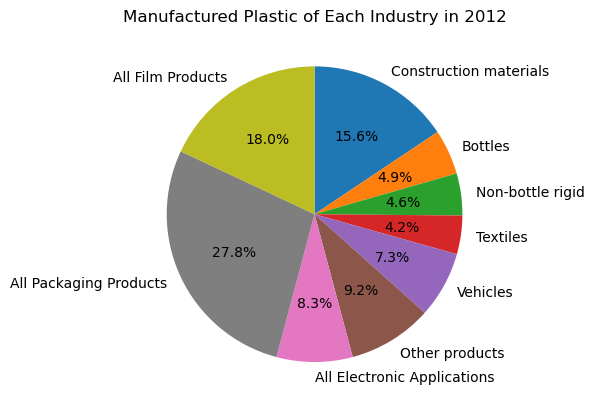

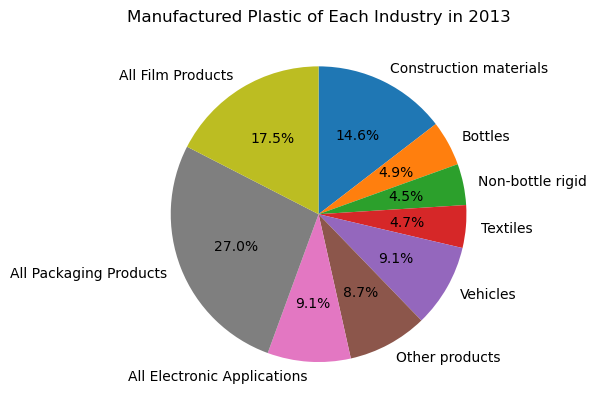

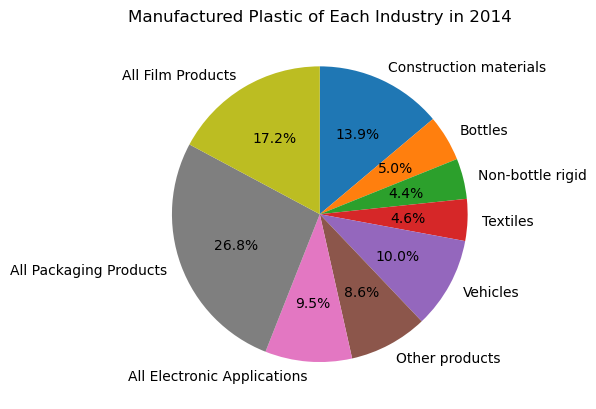

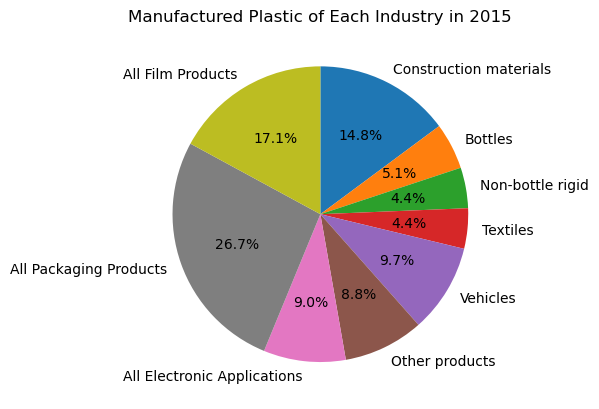

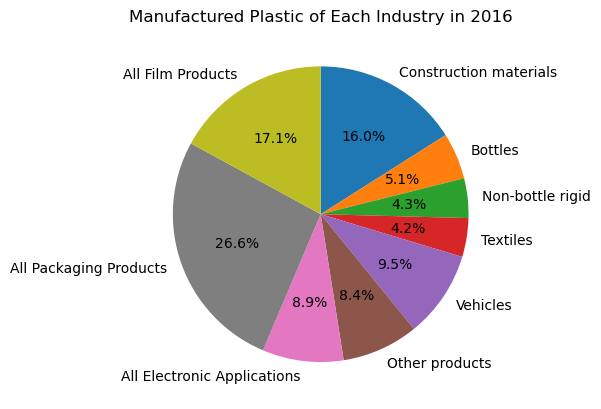

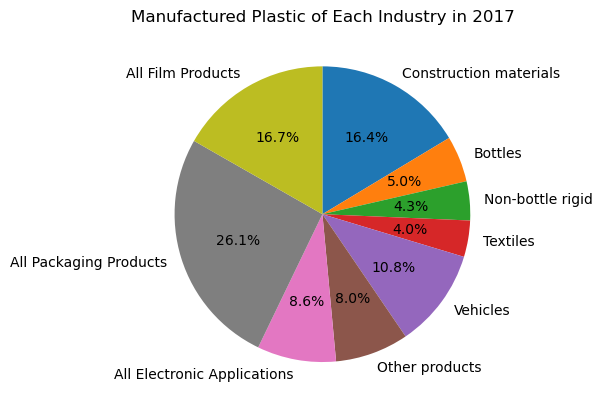

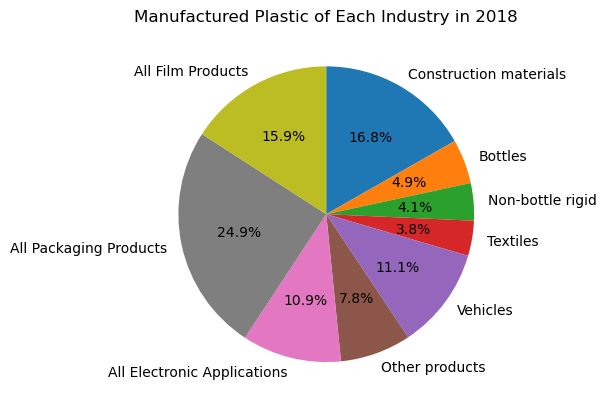

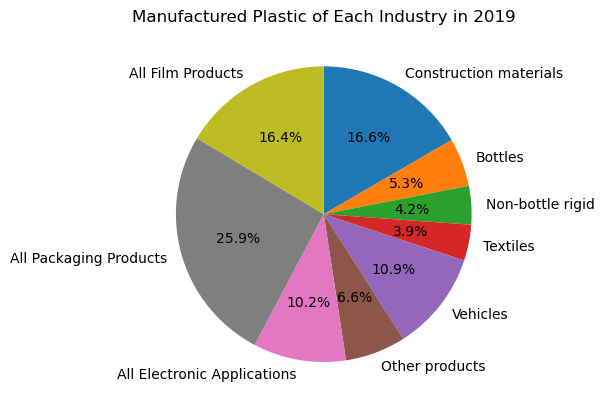

In [6]:
df.set_index('Year', inplace=True)

# Creating Pie Plot for each year
for year in df.index:
    values = df.loc[year].values
    plt.pie(values, labels=df.columns, autopct='%1.1f%%', startangle=90, counterclock=False)
    plt.title(f'Manufactured Plastic of Each Industry in {year}')
    plt.show()

Each year, we can see that packaging products use the most plastic in manufacturing, making up for approximately 25-27% of the total plastic material used across all industries mentioned in the data. Film products and electronic applications are the other major contributors. 

A stacked area plot could be used as better way of illustrating this, as well as other information such as the total plastic usage for the year and yearly trends. The code block below shows the implementation of a stacked area plot visualization using standard matplotlib functions. 

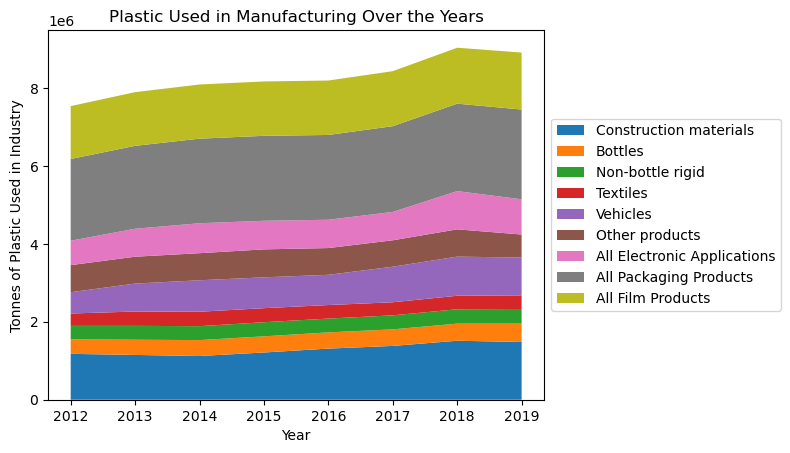

In [7]:
# Creating Stacked Area Plot
plt.stackplot(df.index, df.T, labels=df.columns)
plt.title('Plastic Used in Manufacturing Over the Years')
plt.xlabel('Year')
plt.ylabel('Tonnes of Plastic Used in Industry')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Next, let's try summing the total plastic usage from each industry over the years and visualizing the comparison as a bar chart. The ```plt.bar``` function from matplotlib is designed specifically to help us approach visualization tasks like this! Let's take a look at how we would use it in this scenario:

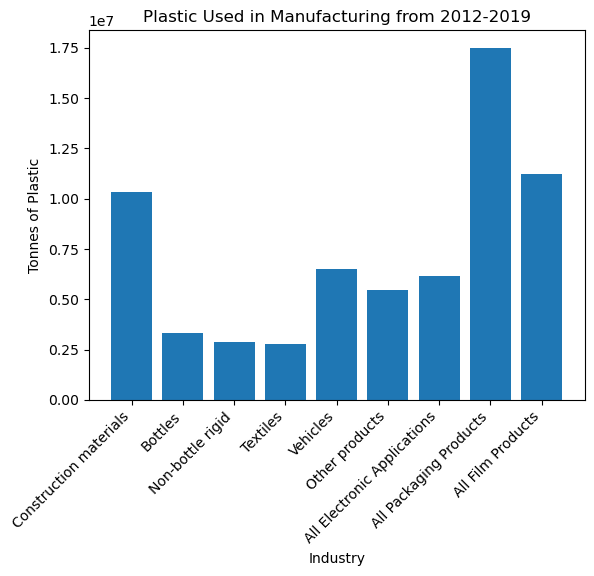

In [8]:
# Calculate the sum of each column
column_sums = df.sum()

# Plotting the bar graph
plt.bar(column_sums.index, column_sums)
plt.title('Plastic Used in Manufacturing from 2012-2019')
plt.xlabel('Industry')
plt.ylabel('Tonnes of Plastic')
plt.xticks(rotation=45, ha='right')
plt.show()

As expected based on the results of the prior plots, the bar chart also shows that the packaging product industry uses the most plastic in manufacturing by an overwhelming amount. The total amount of plastic material used in manufacturing packaging products from 2012 - 2019 was approximately 1.75 * 1e7 = 17.5 million tonnes. To confirm, we can run the code snippet below:

In [9]:
print('Total Plastic Manufactured in Packaging Products from 2012 - 2019 is', df['All Packaging Products'].sum(), 'tonnes.')

Total Plastic Manufactured in Packaging Products from 2012 - 2019 is 17500325 tonnes.


Since the packaging product industry seems to have the greatest impact on plastic usage, let's take a deeper look by plotting a scatter graph to show the yearly trend. We will use ```plt.scatter``` from matplotlib to display the data points on a two-dimensional graph with the year on the x-axis and plastic usage (in tonnes) on the y-axis.

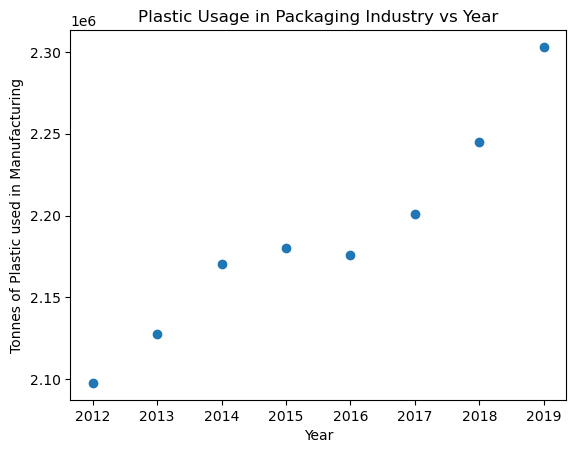

In [10]:
# Plotting the scatter graph
plt.scatter(df.index, df['All Packaging Products'])
plt.title('Plastic Usage in Packaging Industry vs Year')
plt.xlabel('Year')
plt.ylabel('Tonnes of Plastic used in Manufacturing')
plt.show()

Overall, the scatter plot shows a growing yearly trend in the plastic used to manufacture packaging products. It seems there is an outlier to the trend in 2016, which is the only year in which the plastic usage decreased.

### Your turn: An activity for practice! 

This time, try creating a scatter plot visualization to show the yearly trend of plastic usage in the vehicle manufacturing industry. Can you also determine how much plastic was used in total for the vehicle industry? See if you can do this one on your own! (Hint: This example is very similar to the one we just looked at for the packaging industry)

In [11]:
# Answer Key - Uncomment code below to see the plot!

# plt.scatter(df.index, df['Vehicles'])
# plt.title('Plastic Usage in Vehicle Industry vs Year')
# plt.xlabel('Year')
# plt.ylabel('Tonnes of Plastic used in Vehicle Manufacture')
# plt.show()

# print('Total Plastic Used in Vehicle Manufacture from 2012 - 2019 is', df['Vehicles'].sum(), 'tonnes.')